**#IMPORT NECESSARY LIBRARIES**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
print("done!")

done!


**#LOAD DATA, HAVE A LOOK AT THE DATA**

In [21]:
#read csv
diabetes = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv").convert_dtypes()
#look at the first 5 entries
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**#RENAME COLUMNS**

In [22]:
#create a dataset copy to work with
diabetes_data = diabetes

#rename columns
diabetes_data.rename(columns={"Pregnancies": "no_of_pregnancies",
                             "Glucose" : "glucose_level",
                             "BloodPressure" : "blood_pressure",
                             "SkinThickness" : "skin_thickness",
                             "Insulin" : "insulin_level",
                             "BMI" : "bmi_index",
                             "DiabetesPedigreeFunction" : "diabetes_percentage",
                             "Age" : "age",
                             "Outcome" : "outcome"}, inplace = True)

diabetes_data.head()

,no_of_pregnancies,glucose_level,blood_pressure,skin_thickness,insulin_level,bmi_index,diabetes_percentage,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   no_of_pregnancies    768 non-null    Int64  
 1   glucose_level        768 non-null    Int64  
 2   blood_pressure       768 non-null    Int64  
 3   skin_thickness       768 non-null    Int64  
 4   insulin_level        768 non-null    Int64  
 5   bmi_index            768 non-null    Float64
 6   diabetes_percentage  768 non-null    Float64
 7   age                  768 non-null    Int64  
 8   outcome              768 non-null    Int64  
dtypes: Float64(2), Int64(7)
memory usage: 60.9 KB


In [24]:
diabetes_data.describe()

,no_of_pregnancies,glucose_level,blood_pressure,skin_thickness,insulin_level,bmi_index,diabetes_percentage,age,outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232,0.476951
min,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.24375,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.3725,29.0,0.0
75%,6.0,140.25,80.0,32.0,127.25,36.6,0.62625,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0


**#What are the main risk factors for diabetes?**

In [25]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()

# Sort correlations with respect to 'outcome'
correlation_with_outcome = correlation_matrix['outcome'].sort_values(ascending=False)

correlation_with_outcome

outcome                1.000000
glucose_level          0.466581
bmi_index              0.292695
age                    0.238356
no_of_pregnancies      0.221898
diabetes_percentage    0.173844
insulin_level          0.130548
skin_thickness         0.074752
blood_pressure         0.065068
Name: outcome, dtype: float64

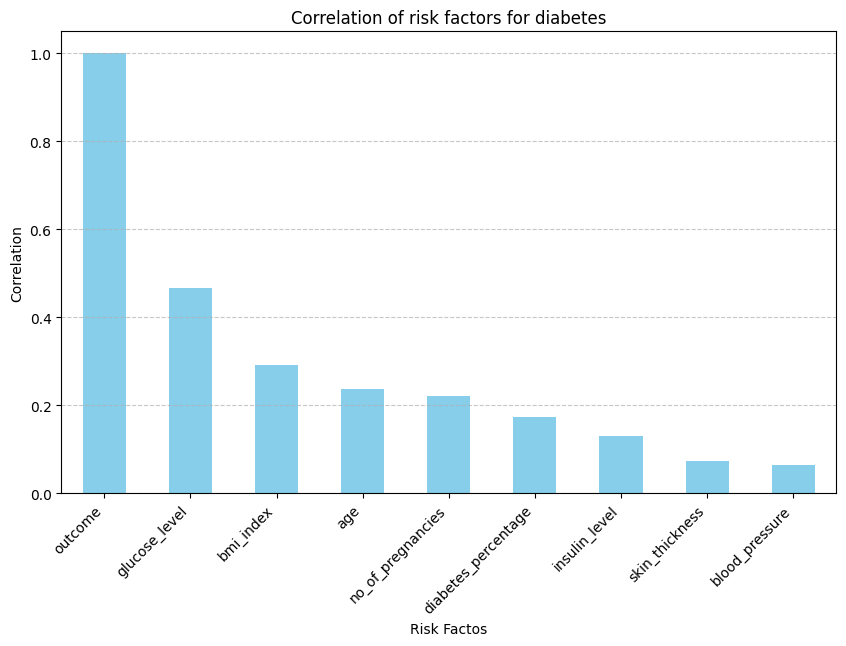

In [26]:
# Plot histogram
plt.figure(figsize=(10, 6))
correlation_with_outcome.plot(kind='bar', color='skyblue')
plt.title('Correlation of risk factors for diabetes')
plt.xlabel('Risk Factos')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**#What is the distribution of BMI among individuals with and without diabetes?**

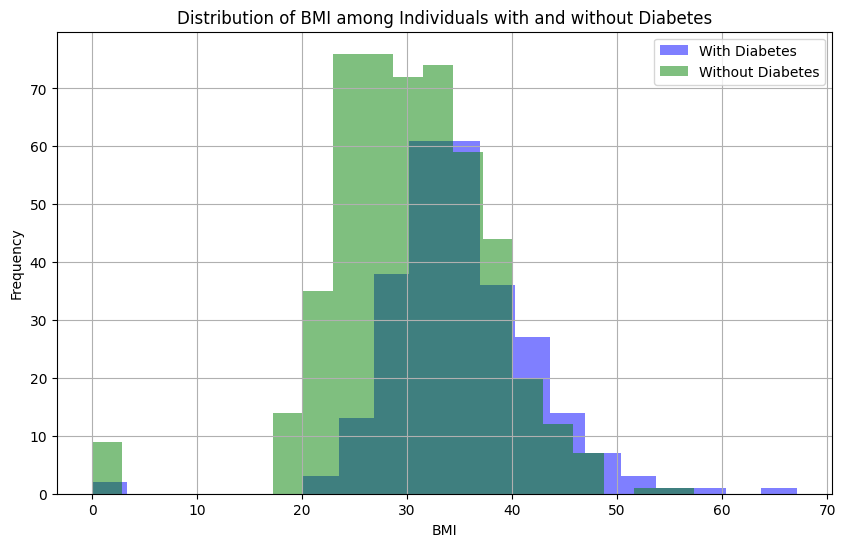

In [27]:
# Separate data for individuals with and without diabetes
with_diabetes = diabetes_data[diabetes_data['outcome'] == 1]['bmi_index']
without_diabetes = diabetes_data[diabetes_data['outcome'] == 0]['bmi_index']

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(with_diabetes, bins=20, alpha=0.5, color='blue', label='With Diabetes')
plt.hist(without_diabetes, bins=20, alpha=0.5, color='green', label='Without Diabetes')

plt.title('Distribution of BMI among Individuals with and without Diabetes')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**#How does the number of pregnancies affect chances of being diabetic, what number of pregnancies increase the risk of diabetes?**

In [28]:
# Calculate correlation coefficient between 'no_of_pregnancies' and 'outcome'
correlation = diabetes_data['no_of_pregnancies'].corr(diabetes_data['outcome'])

if correlation >= 0 and correlation < 0.2:
    print(str(correlation) + " - Very weak or no correlation")
elif correlation >= 0.2 and correlation <= 0.4:
    print(str(correlation) + " - Weak correlation")
elif correlation > 0.4 and correlation <= 0.7:
    print(str(correlation) + " - Moderate correlation")
elif correlation > 0.7 and correlation <= 1.0:
    print(str(correlation) + " - Strong correlation")



0.22189815303398613 - Weak correlation


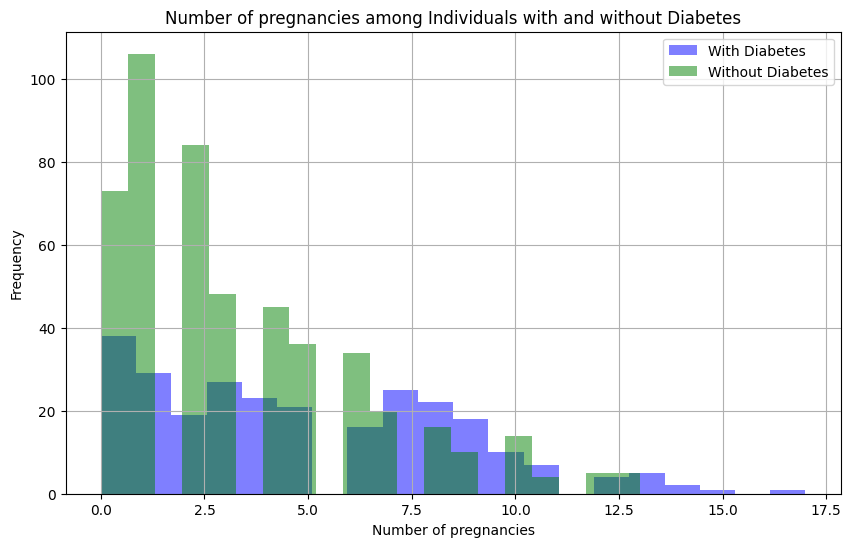

In [29]:
# Separate data for no_of_pregnancies in patients with and without diabetes
with_diabetes = diabetes_data[diabetes_data['outcome'] == 1]['no_of_pregnancies']
without_diabetes = diabetes_data[diabetes_data['outcome'] == 0]['no_of_pregnancies']

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(with_diabetes, bins=20, alpha=0.5, color='blue', label='With Diabetes')
plt.hist(without_diabetes, bins=20, alpha=0.5, color='green', label='Without Diabetes')

plt.title('Number of pregnancies among Individuals with and without Diabetes')
plt.xlabel('Number of pregnancies')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**#Does the Diabetes Pedigree Function (a measure of genetic influence) correlate with the likelihood of diabetes?**

In [30]:
# Calculate correlation coefficient between 'diabetes_percentage' and 'outcome'
correlation = diabetes_data['diabetes_percentage'].corr(diabetes_data['outcome'])

if correlation >= 0 and correlation < 0.2:
    print(str(correlation) + " - Very weak or no correlation")
elif correlation >= 0.2 and correlation <= 0.4:
    print(str(correlation) + " - Weak correlation")
elif correlation > 0.4 and correlation <= 0.7:
    print(str(correlation) + " - Moderate correlation")
elif correlation > 0.7 and correlation <= 1.0:
    print(str(correlation) + " - Strong correlation")



0.1738440656529596 - Very weak or no correlation


****

**#Is there a pattern in insulin and glucose levels among diabetic patients?**

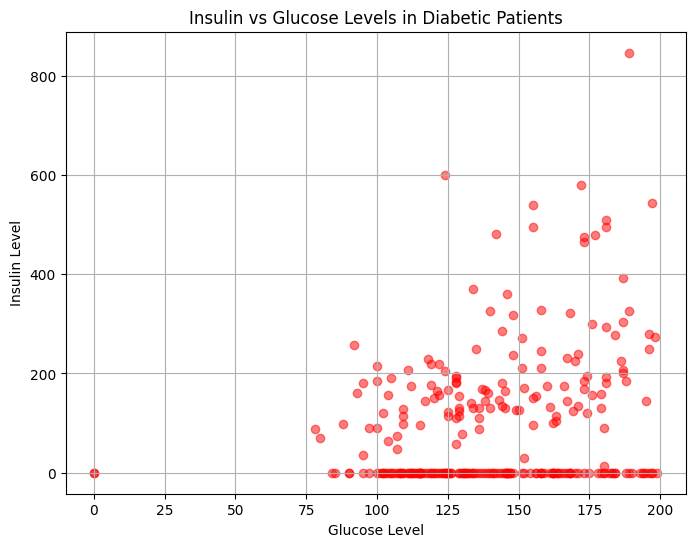

In [31]:
# Filter data for diabetic patients
diabetic_patients = diabetes_data[diabetes_data['outcome'] == 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(diabetic_patients['glucose_level'], diabetic_patients['insulin_level'], color='red', alpha=0.5)
plt.title('Insulin vs Glucose Levels in Diabetic Patients')
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
plt.grid(True)
plt.show()

**#Is there a relationship between age and the risk of diabetes?**

In [32]:
# Calculate correlation coefficient between 'diabetes_percentage' and 'outcome'
correlation = diabetes_data['age'].corr(diabetes_data['outcome'])

if correlation >= 0 and correlation < 0.2:
    print(str(correlation) + " - Very weak or no correlation")
elif correlation >= 0.2 and correlation <= 0.4:
    print(str(correlation) + " - Weak correlation")
elif correlation > 0.4 and correlation <= 0.7:
    print(str(correlation) + " - Moderate correlation")
elif correlation > 0.7 and correlation <= 1.0:
    print(str(correlation) + " - Strong correlation")


0.23835598302719754 - Weak correlation


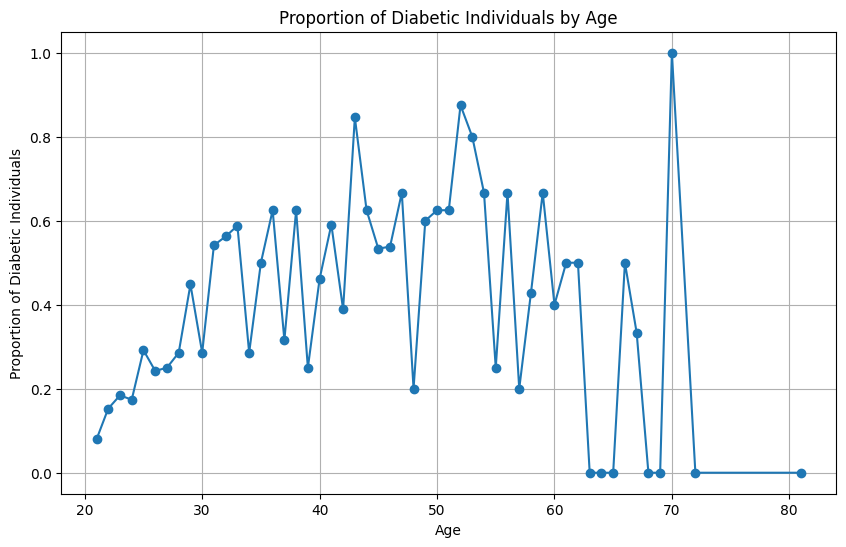

In [33]:
# Subset the data to include only 'age' and 'outcome' columns
age_outcome = diabetes_data[['age', 'outcome']]

# Group by 'age' and calculate the proportion of diabetic individuals at each age
age_diabetes_proportion = age_outcome.groupby('age')['outcome'].mean()

# Plot the relationship between age and the proportion of diabetic individuals
plt.figure(figsize=(10, 6))
age_diabetes_proportion.plot(marker='o', linestyle='-')
plt.title('Proportion of Diabetic Individuals by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Diabetic Individuals')
plt.grid(True)
plt.show()

**Report:


* Major risk factor for diabetes seems to be high glucose level in the blood.

* High BMI index also has a small correlation to diabetes, this is because excess body fat can lead to insulin resistance, where the body's cells become less responsive to insulin, resulting in elevated blood sugar levels.

* Patients with a BMI index of greater than 27 increases the risk of diabetes, however a BMI greater than 30 is much more riskier.

* Most diabetic patients have high glucose levels and low insulin levels, this is because insulin helps regulate blood glucose levels by facilitating the uptake of glucose into cells.which isn't mostly the case with diabetic patients.

* While there is a weak positive correlation of 0.24 between age and the likelihood of diabetes in our dataset, it's important to note that age becomes a more significant risk factor as individuals reach certain milestones. Notably, at the age of 70, we observe the highest prevalence of diabetes among our dataset participants. This suggests that advancing age is associated with an increased risk of developing diabetes, even though the correlation coefficient indicates only a weak relationship overall.

* There isn't a direct link between number of pregnancies and diabetes, however mothers increase their risk while having seven pregnancies and more.**